In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/91961/Downloads/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
df.shape

(1000, 10)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())


Unique values in gender:
gender
female    518
male      482
Name: count, dtype: int64

Unique values in race_ethnicity:
race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

Unique values in parental_level_of_education:
parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

Unique values in lunch:
lunch
standard        645
free/reduced    355
Name: count, dtype: int64

Unique values in test_preparation_course:
test_preparation_course
none         642
completed    358
Name: count, dtype: int64


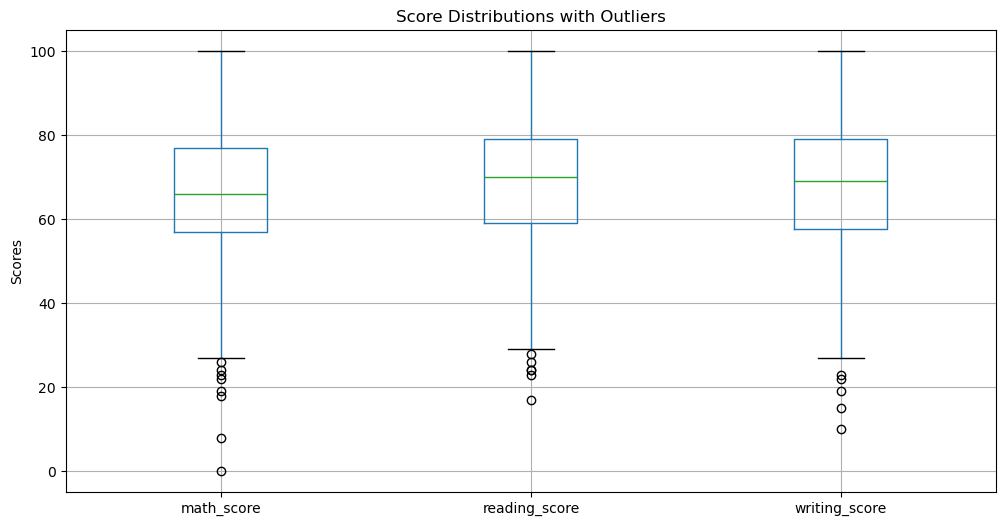

In [6]:
plt.figure(figsize=(12,6))
df.boxplot(column=['math_score', 'reading_score', 'writing_score'])
plt.title('Score Distributions with Outliers')
plt.ylabel('Scores')
plt.show()

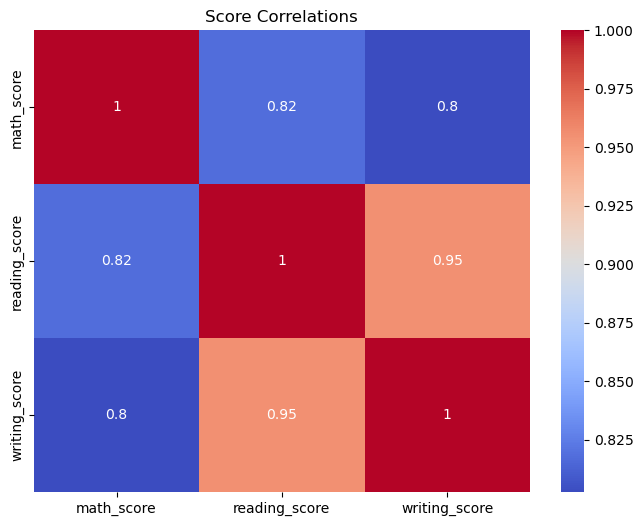

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['math_score', 'reading_score', 'writing_score']].corr(), 
            annot=True, cmap='coolwarm')
plt.title('Score Correlations')
plt.show()

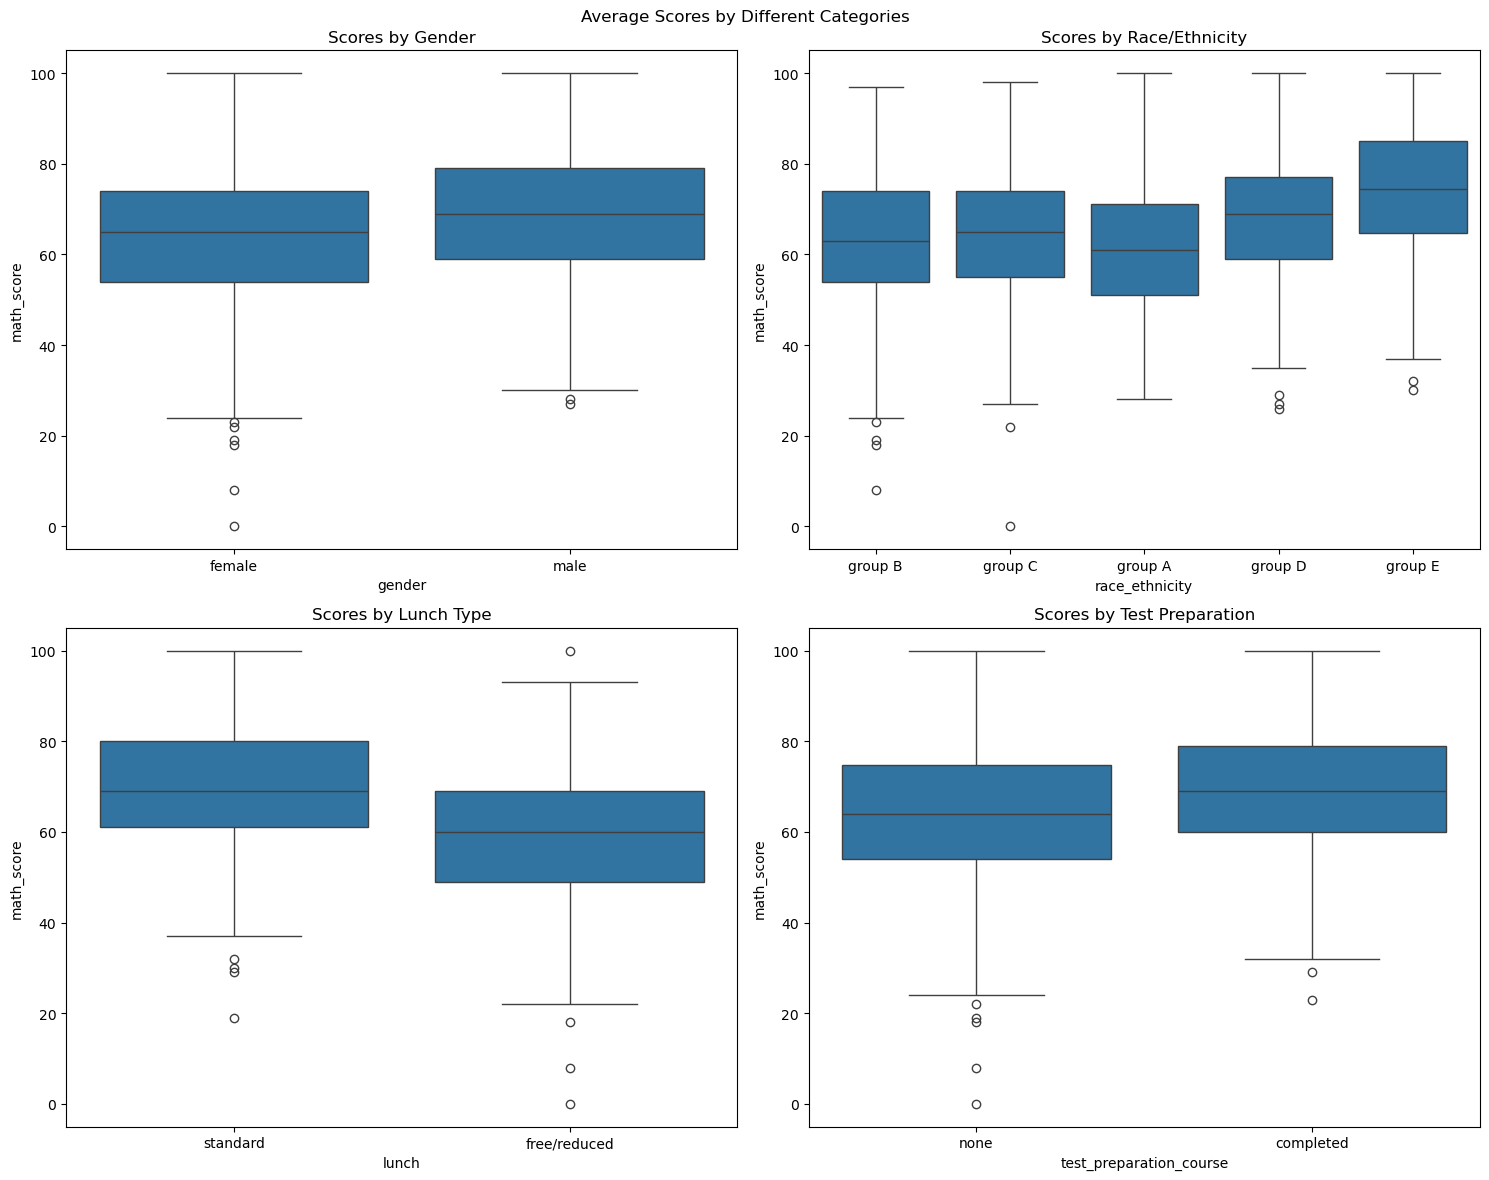

In [9]:
# Analyze performance by categories
fig, axes = plt.subplots(2, 2, figsize=(15,12))
fig.suptitle('Average Scores by Different Categories')

sns.boxplot(data=df, x='gender', y='math_score', ax=axes[0,0])
axes[0,0].set_title('Scores by Gender')

sns.boxplot(data=df, x='race_ethnicity', y='math_score', ax=axes[0,1])
axes[0,1].set_title('Scores by Race/Ethnicity')

sns.boxplot(data=df, x='lunch', y='math_score', ax=axes[1,0])
axes[1,0].set_title('Scores by Lunch Type')

sns.boxplot(data=df, x='test_preparation_course', y='math_score', ax=axes[1,1])
axes[1,1].set_title('Scores by Test Preparation')

plt.tight_layout()
plt.show()

In [11]:
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

for column in ['math_score', 'reading_score', 'writing_score']:
    print(f"\nOutliers in {column}:")
    print(find_outliers(df, column))


Outliers in math_score:
17     18
59      0
145    22
338    24
466    26
787    19
842    23
980     8
Name: math_score, dtype: int64

Outliers in reading_score:
59     17
76     26
211    28
327    23
596    24
980    24
Name: reading_score, dtype: int64

Outliers in writing_score:
59     10
76     22
327    19
596    15
980    23
Name: writing_score, dtype: int64


In [12]:
# Add average score column
df['avg_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)

# Add performance category
df['performance_cat'] = pd.qcut(df['avg_score'], q=4, labels=['Poor', 'Fair', 'Good', 'Excellent'])